# Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP
from sklearn.manifold import TSNE
from trimap import TRIMAP
from pacmap import PaCMAP

# Подключение датасета (Вариант №8)

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [4]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [5]:
X.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302     True
Length: 303, dtype: bool

In [6]:
na_index = X.loc[X.isna().any(axis=1)].index.tolist()

In [7]:
y_proc = y.drop(index=na_index)

In [10]:
X_proc = X.drop(index=na_index)

In [13]:
from sklearn.preprocessing import RobustScaler

In [16]:
X_arr = np.array(X_proc)

In [17]:
X_scaled = RobustScaler().fit_transform(X_arr)

In [19]:
y_arr = np.array(y_proc)

### T-SNE

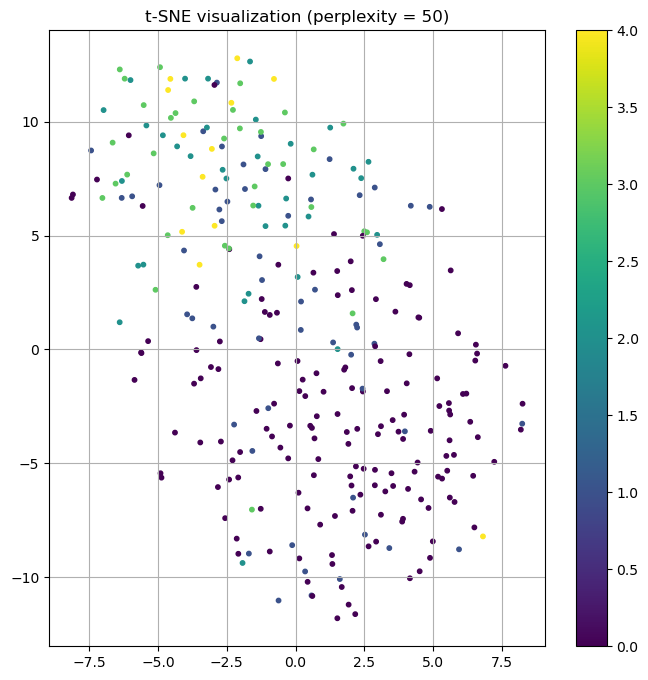

CPU times: total: 1.39 s
Wall time: 862 ms


In [24]:
%%time

tsne = TSNE(random_state=52, perplexity=50, n_components=2, max_iter=1000).fit_transform(X_scaled)

plt.figure(figsize=(8, 8))
plt.scatter(tsne[:, 0], tsne[:, 1], s=10, c=y_arr, cmap='viridis')
plt.title(f't-SNE visualization (perplexity = {50})')
plt.grid(True)
plt.colorbar()
plt.show()

### UMAP

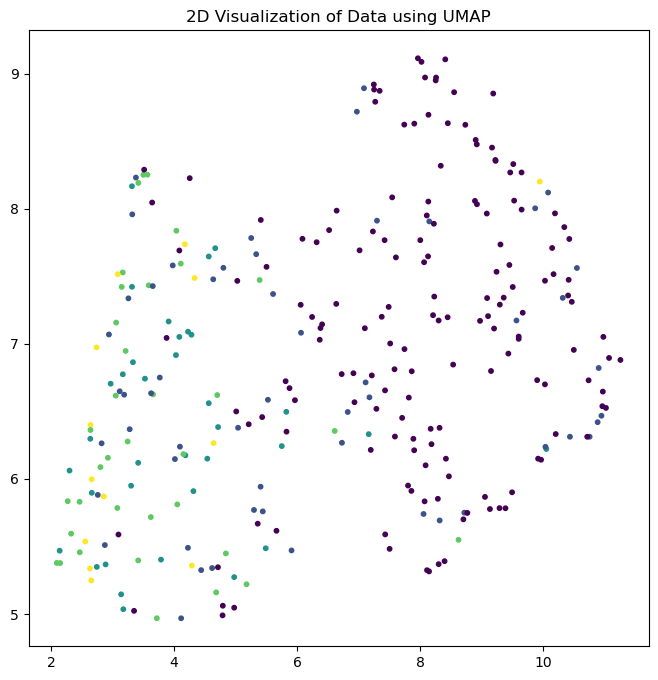

CPU times: total: 1.2 s
Wall time: 1.36 s


In [41]:
%%time

umap = UMAP(n_neighbors=10, min_dist=0.1).fit_transform(X_scaled)

plt.figure(figsize=(8, 8))


plt.scatter(umap[:, 0], umap[:, 1], s=10, c=y_arr, cmap='viridis')

plt.title('2D Visualization of Data using UMAP')

plt.show()

### TRIMAP

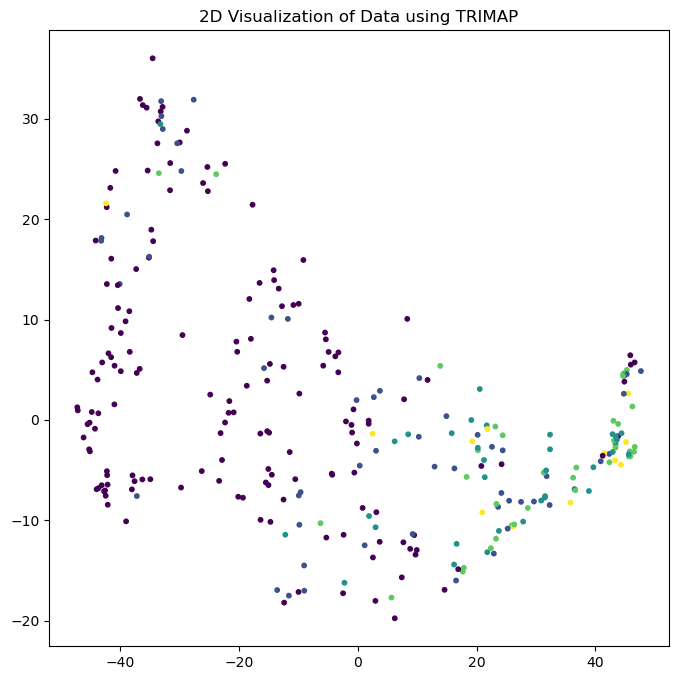

CPU times: total: 141 ms
Wall time: 183 ms


In [32]:
%%time

trimap = TRIMAP().fit_transform(X_scaled)

plt.figure(figsize=(8, 8))

plt.scatter(trimap[:, 0], trimap[:, 1], s=10, c=y_arr, cmap='viridis')

plt.title('2D Visualization of Data using TRIMAP')

plt.show()

### PACMAP

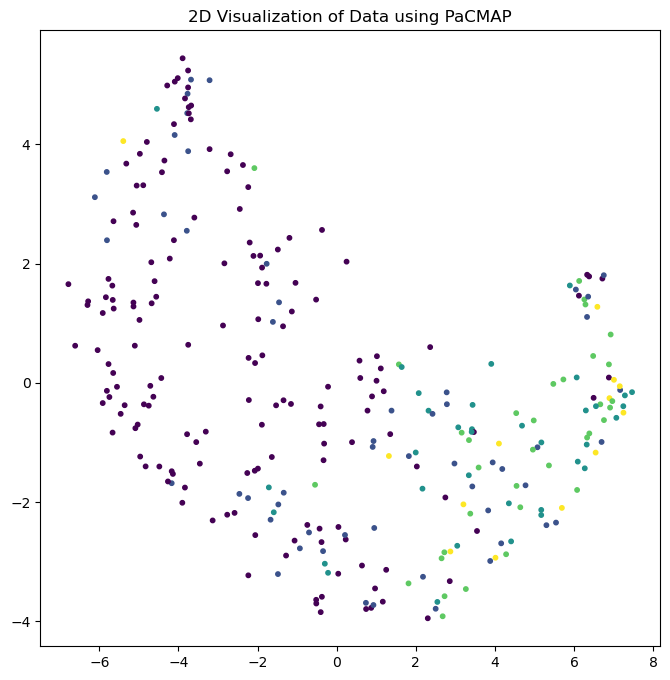

CPU times: total: 625 ms
Wall time: 150 ms


In [37]:
%%time

pacmap = PaCMAP().fit_transform(X_scaled)

plt.figure(figsize=(8, 8))

plt.scatter(pacmap[:, 0], pacmap[:, 1], s=10, c=y_arr, cmap='viridis')

plt.title('2D Visualization of Data using PaCMAP')

plt.show()